# GDP/ RQ1 analysis prep

# Purpose 
The purpose of this notebook is to set up and create all the fields we will need for proper analysis of GDP for example creating columns with all the nomrailsed values of GDP, GDP Per capita, Rating Share etc. We also create this Rating field so countries performance can be compared. 

# Datasets
Uses: <br>
** complete_data.csv ** from 1000-Joining <br>
Creates: <br>
** gdp.csv ** a csv with all the required fields for proper GDP analysis. 

In [45]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import string
import sys, os

In [46]:
# Ensure the file exists
if not os.path.exists(  r"..\..\data\analysis\complete_data.csv" ):
    print("Missing dataset file")

In [47]:
# read the medal csv into a dataframe
df = pd.read_csv(  r"..\..\data\analysis\complete_data.csv", encoding = "ISO-8859-1")

In [48]:
# looking at the GDP dataset
df.columns

Index(['Unnamed: 0', 'Year', 'Host_Country', 'Host_City', 'Summer', 'Winter',
       'Total_Males', 'Total_Females', 'Total_Athletes', 'Discipline', 'Sport',
       'Ath_Name', 'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'NOC_Gold', 'NOC_Silver',
       'NOC_Bronze', 'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Country',
       'Population', 'Males', 'Females', 'Life_Expectancy', 'GDP', 'Region',
       'Elevation', 'Area_SqKM', 'Centroid_Longitude', 'Centroid_Latitude',
       'Population_Density', 'CO2_Emissions', 'Methane_Emissions',
       'Nitrous_Oxide_Emisions', 'Total_Emissions', 'Emmisions_per_Capita',
       'Code', 'Lowest_Point', 'Highest_Point', 'Elevation_Range',
       'Education_Index'],
      dtype='object')

In [49]:
#First we'll drop all unnecessary columns 
df = df.drop(df.columns[[0, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51]], axis=1)

In [50]:
# A look with all the fields relevant to GDP analysis 
df.columns

Index(['Year', 'Host_Country', 'Host_City', 'Summer', 'Winter', 'Total_Males',
       'Total_Females', 'Total_Athletes', 'Discipline', 'Sport', 'Ath_Name',
       'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze', 'Total_Medals',
       'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent', 'NOC_Females_Sent',
       'NOC_Total_Sent', 'NOC_Gold', 'NOC_Silver', 'NOC_Bronze',
       'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Country', 'Population',
       'GDP', 'Code'],
      dtype='object')

# Creating a fair comparison field (Medal Share)
First we'll create the attional fields Total Bronze, Total Silver, Total Gold, Total Medals and Total Medals for each NOC. then we'll also have to get the Total Bronze, Total Silver, Total Gold, Total Medals and Total Medals for each Olympic games so we can create the Medal share field for each NOC allowing use to compare their performances. 

In [51]:
# Getting all the total values for each of the NOCs
NOC_Totals = df.groupby(['Year', 'Host_City', 'NOC'])[["Gold", 'Total_Medals', 'Ath_Rating']].sum().reset_index()

In [52]:
# re-sorting the NOc_Table by total medals and rating 
NOC_Totals = NOC_Totals.sort_values(by=['Year', 'Host_City', 'Total_Medals', 'Ath_Rating'], ascending=False).reset_index()
# Renaming columns for joining 
NOC_Totals.rename(columns={'Gold': 'N_Total_Gold'}, inplace=True)
NOC_Totals.rename(columns={'Total_Medals': 'N_Total_Medals'}, inplace=True)
NOC_Totals.rename(columns={'Ath_Rating': 'N_Total_Rating'}, inplace=True)
# Dropping the old index 
NOC_Totals = NOC_Totals.drop(NOC_Totals.columns[[0]], axis=1)

In [53]:
NOC_Totals.head(5)

,Year,Host_City,NOC,N_Total_Gold,N_Total_Medals,N_Total_Rating
0,2016,Rio,USA,140,265,599
1,2016,Rio,GER,49,160,302
2,2016,Rio,GBR,64,143,325
3,2016,Rio,RUS,52,114,246
4,2016,Rio,CHN,46,113,235


In [54]:
# Getting all the total values for each of the Games
Games_Totals = NOC_Totals.groupby(['Year', 'Host_City'])[["N_Total_Gold", 'N_Total_Medals', 'N_Total_Rating']].sum().reset_index()

In [55]:
# re-sorting the NOc_Table by total medals and rating 
Games_Totals = Games_Totals.sort_values(by=['Year', 'Host_City', 'N_Total_Medals', 'N_Total_Rating'], ascending=False).reset_index()
# Renaming the columns for joining 
Games_Totals.rename(columns={'N_Total_Gold': 'G_Total_Gold'}, inplace=True)
Games_Totals.rename(columns={'N_Total_Medals': 'G_Total_Medals'}, inplace=True)
Games_Totals.rename(columns={'N_Total_Rating': 'G_Total_Rating'}, inplace=True)
# Dropping the old index 
Games_Totals = Games_Totals.drop(Games_Totals.columns[[0]], axis=1)

In [56]:
Games_Totals.head(5)

,Year,Host_City,G_Total_Gold,G_Total_Medals,G_Total_Rating
0,2016,Rio,667,2021,4009
1,2014,Sochi,200,601,1198
2,2012,London,634,1944,3845
3,2010,Vancouver,176,529,1058
4,2008,Beijing,666,2039,4036


In [57]:
# Setting the indexes of both tables so they are joinable 
NOC_Totals = NOC_Totals.set_index(['Year', 'Host_City'])
Games_Totals = Games_Totals.set_index(['Year', 'Host_City'])

In [58]:
Totalsdf = NOC_Totals.join(Games_Totals).reset_index()

In [59]:
Totalsdf.head(5)

,Year,Host_City,NOC,N_Total_Gold,N_Total_Medals,N_Total_Rating,G_Total_Gold,G_Total_Medals,G_Total_Rating
0,1960,Rome,URS,61,169,354,295,882,1758
1,1960,Rome,USA,68,112,271,295,882,1758
2,1960,Rome,EUA,34,88,189,295,882,1758
3,1960,Rome,ITA,36,88,178,295,882,1758
4,1960,Rome,HUN,13,65,107,295,882,1758


In [60]:
Totalsdf['Gold_Share'] = Totalsdf['N_Total_Gold'] / Totalsdf['G_Total_Gold']
Totalsdf['Medal_Share'] = Totalsdf['N_Total_Medals'] / Totalsdf['G_Total_Medals']
Totalsdf['Rating_Share'] = Totalsdf['N_Total_Rating'] / Totalsdf['G_Total_Rating']

In [61]:
Totalsdf.head(5)

,Year,Host_City,NOC,N_Total_Gold,N_Total_Medals,N_Total_Rating,G_Total_Gold,G_Total_Medals,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share
0,1960,Rome,URS,61,169,354,295,882,1758,0.206780,0.191610,0.201365
1,1960,Rome,USA,68,112,271,295,882,1758,0.230508,0.126984,0.154152
2,1960,Rome,EUA,34,88,189,295,882,1758,0.115254,0.099773,0.107509
3,1960,Rome,ITA,36,88,178,295,882,1758,0.122034,0.099773,0.101251
4,1960,Rome,HUN,13,65,107,295,882,1758,0.044068,0.073696,0.060865


In [62]:
df.head(5)

,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,Sport,...,NOC_Gold,NOC_Silver,NOC_Bronze,NOC_Total_Medals,NOC_Rating,NOC_Rank,Country,Population,GDP,Code
0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,0,3,1,4,7,26,Argentina,20619075.0,2.117186e+10,ARG
1,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,0,3,1,4,7,26,Argentina,20619075.0,2.117186e+10,ARG
2,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,0,3,1,4,7,26,Argentina,20619075.0,2.117186e+10,ARG
3,1960,ITA,Rome,True,False,4727,611,5338,Boxing,Boxing,...,0,3,1,4,7,26,Argentina,20619075.0,2.117186e+10,ARG
4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,10,17,9,36,73,6,Australia,10276477.0,1.859335e+10,AUS


In [63]:
df.columns

Index(['Year', 'Host_Country', 'Host_City', 'Summer', 'Winter', 'Total_Males',
       'Total_Females', 'Total_Athletes', 'Discipline', 'Sport', 'Ath_Name',
       'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze', 'Total_Medals',
       'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent', 'NOC_Females_Sent',
       'NOC_Total_Sent', 'NOC_Gold', 'NOC_Silver', 'NOC_Bronze',
       'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Country', 'Population',
       'GDP', 'Code'],
      dtype='object')

# Re-joining the dfs 

In [64]:
# Setting the indexes of both tables so they are joinable 
df = df.set_index(['Year', 'Host_City', 'NOC'])
Totalsdf = Totalsdf.set_index(['Year', 'Host_City', 'NOC'])
# joining both dataFrames only with relevant columns and resetting the index
df = df[['Host_Country', 'Summer', 'Winter', 'Total_Males', 'Total_Females', 'NOC_Males_Sent', 'NOC_Females_Sent', 'NOC_Total_Sent', 'Country', 'Population', 'GDP', 'Code']].join(Totalsdf).reset_index()

# Dropping indexes and the old index 
df = df.drop_duplicates().reset_index()
df = df.drop(df.columns[[0]], axis=1)

# Normalization of GDP 
We will be using min max normalization to do this. Minmax normalization will take a given GDP value x and apply the following formula to get all the normalised values y for GDP. y = (x - min(x)) / (max(x) - min(x))  

In [65]:
# min and max values 
maxGDP = df['GDP'].max()
minGDP = df['GDP'].min()

In [66]:
df['Norm_GDP'] = (df['GDP'] - minGDP) / (maxGDP - minGDP) 

In [67]:
df.head(3)

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,N_Total_Gold,N_Total_Medals,N_Total_Rating,G_Total_Gold,G_Total_Medals,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP
0,1960,Rome,ARG,ITA,True,False,4727,611,91.0,0.0,...,0,4,7,295,882,1758,0.000000,0.004535,0.003982,0.001132
1,1960,Rome,AUS,ITA,True,False,4727,611,165.0,29.0,...,10,36,73,295,882,1758,0.033898,0.040816,0.041524,0.000994
2,1960,Rome,AUT,ITA,True,False,4727,611,83.0,21.0,...,1,3,7,295,882,1758,0.003390,0.003401,0.003982,0.000349


# Normalization of GDP Per Capita 
First we'll create a columnfor GDP per capita then we'll normalise the values like we did below. 
We will be using min max normalization to do this. Minmax normalization will take a given GDP Per Capita value x and apply the following formula to get all the normalised values y for GDP Per Capita. y = (x - min(x)) / (max(x) - min(x))  

In [68]:
# GDP per capita 
df['GDP_PerCapita'] = df['GDP'] / df['Population']

In [69]:
# min and max values 
maxGDPPC = df['GDP_PerCapita'].max()
minGDPPC = df['GDP_PerCapita'].min()

In [70]:
df['Norm_GDPPC'] = (df['GDP_PerCapita'] - minGDPPC) / (maxGDPPC - minGDPPC) 

In [71]:
df.head(3)

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,N_Total_Rating,G_Total_Gold,G_Total_Medals,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC
0,1960,Rome,ARG,ITA,True,False,4727,611,91.0,0.0,...,7,295,882,1758,0.000000,0.004535,0.003982,0.001132,1026.809259,0.009964
1,1960,Rome,AUS,ITA,True,False,4727,611,165.0,29.0,...,73,295,882,1758,0.033898,0.040816,0.041524,0.000994,1809.311452,0.017662
2,1960,Rome,AUT,ITA,True,False,4727,611,83.0,21.0,...,7,295,882,1758,0.003390,0.003401,0.003982,0.000349,935.460427,0.009065


# Normalization of Gold Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Gold share x and apply the following formula to get all the normalised values y for the Gold Share. y = (x - min(x)) / (max(x) - min(x))  

In [72]:
# min and max values 
maxGold = df['Gold_Share'].max()
minGold = df['Gold_Share'].min()

In [73]:
df['Norm_Gold_Share'] = (df['Gold_Share'] - minGold) / (maxGold - minGold) 

In [74]:
df.head(3)

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,G_Total_Gold,G_Total_Medals,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC,Norm_Gold_Share
0,1960,Rome,ARG,ITA,True,False,4727,611,91.0,0.0,...,295,882,1758,0.000000,0.004535,0.003982,0.001132,1026.809259,0.009964,0.000000
1,1960,Rome,AUS,ITA,True,False,4727,611,165.0,29.0,...,295,882,1758,0.033898,0.040816,0.041524,0.000994,1809.311452,0.017662,0.062444
2,1960,Rome,AUT,ITA,True,False,4727,611,83.0,21.0,...,295,882,1758,0.003390,0.003401,0.003982,0.000349,935.460427,0.009065,0.006244


# Normalization of Total Medal Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Total Medal share x and apply the following formula to get all the normalised values y for the Total Medal Share. y = (x - min(x)) / (max(x) - min(x))  

In [75]:
# min and max values 
maxTMedal = df['Medal_Share'].max()
minTMedal = df['Medal_Share'].min()

In [76]:
df['Norm_Total_Medal_Share'] = (df['Medal_Share'] - minTMedal) / (maxTMedal - minTMedal) 

In [77]:
df.head(3)

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,G_Total_Medals,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC,Norm_Gold_Share,Norm_Total_Medal_Share
0,1960,Rome,ARG,ITA,True,False,4727,611,91.0,0.0,...,882,1758,0.000000,0.004535,0.003982,0.001132,1026.809259,0.009964,0.000000,0.012845
1,1960,Rome,AUS,ITA,True,False,4727,611,165.0,29.0,...,882,1758,0.033898,0.040816,0.041524,0.000994,1809.311452,0.017662,0.062444,0.128069
2,1960,Rome,AUT,ITA,True,False,4727,611,83.0,21.0,...,882,1758,0.003390,0.003401,0.003982,0.000349,935.460427,0.009065,0.006244,0.009245


# Normalization of Total Rating Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Total Rating share x and apply the following formula to get all the normalised values y for the Total Rating Share. y = (x - min(x)) / (max(x) - min(x)) 

In [78]:
# min and max values 
maxTRate = df['Rating_Share'].max()
minTRate = df['Rating_Share'].min()

In [79]:
df['Norm_Rating_Share'] = (df['Rating_Share'] - minTRate) / (maxTRate - minTRate) 

In [80]:
df.head(3)

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC,Norm_Gold_Share,Norm_Total_Medal_Share,Norm_Rating_Share
0,1960,Rome,ARG,ITA,True,False,4727,611,91.0,0.0,...,1758,0.000000,0.004535,0.003982,0.001132,1026.809259,0.009964,0.000000,0.012845,0.010977
1,1960,Rome,AUS,ITA,True,False,4727,611,165.0,29.0,...,1758,0.033898,0.040816,0.041524,0.000994,1809.311452,0.017662,0.062444,0.128069,0.121344
2,1960,Rome,AUT,ITA,True,False,4727,611,83.0,21.0,...,1758,0.003390,0.003401,0.003982,0.000349,935.460427,0.009065,0.006244,0.009245,0.010977


# A few Quick Visualisations 

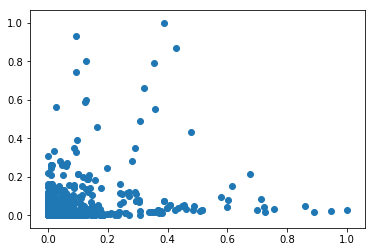

In [81]:
plt.scatter(df.Norm_Gold_Share, df.Norm_GDP)

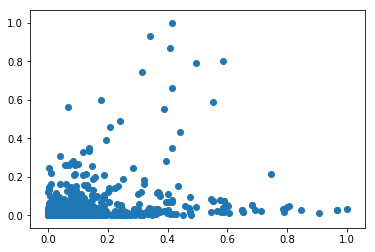

In [82]:
plt.scatter(df.Norm_Total_Medal_Share, df.Norm_GDP)

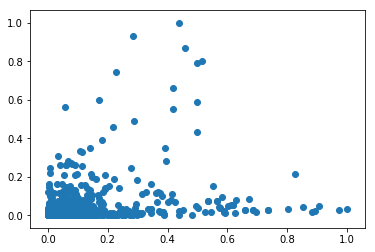

In [83]:
plt.scatter(df.Norm_Rating_Share, df.Norm_GDP)

# GDP PER CAPITA

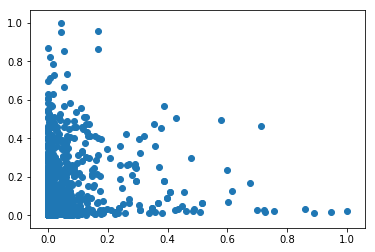

In [84]:
plt.scatter(df.Norm_Gold_Share, df.Norm_GDPPC)

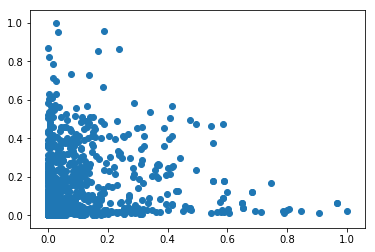

In [85]:
plt.scatter(df.Norm_Total_Medal_Share, df.Norm_GDPPC)

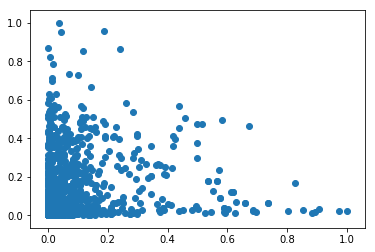

In [86]:
plt.scatter(df.Norm_Rating_Share, df.Norm_GDPPC)

In [87]:
# Some random null values showed up not quite sure why 
df = df[~df['GDP'].isnull()]

In [88]:
df.to_csv(r"..\..\data\final\gdp.csv", index=False)